In [ ]:
pip install pyalgotrading

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import the necessary modules
import pandas as pd # for dealing with the dataframes
import requests # pull requests from url
import numpy as np # for numerical python
import matplotlib.pyplot as plt # plot the graph
import plotly.graph_objects as go # for ploting the plotly graph / candlestick graph
from datetime import datetime # for work with timestamp
import pyalgotrading # algorithmic trading APIs

In [ ]:
# create the class ScriptData
class ScriptData:
    def __init__(self, api_key):
        self.api_key = api_key
        # self.api_key = 4GC2H7P405KUMLR0
    def fetch_intraday_data(self, script): # fucntion for fetches intraday data for given “script”
        url = f"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol={script}&interval=1min&apikey={self.api_key}"
        response = requests.get(url)
        data = response.json()
        return data["Time Series (1min)"]

    def convert_intraday_data(self, script): # functions for converts fetched intraday data as a pandas DataFrame
        intraday_data = self.fetch_intraday_data(script)
        df = pd.DataFrame.from_dict(intraday_data, orient="index")
        df = df.reset_index()
        df.columns = ["timestamp", "open", "high", "low", "close", "volume"] # set the columns name
        df["timestamp"] = pd.to_datetime(df["timestamp"]) # set the data type of the column timestamp as datatime
        # set the data type of the others column as float
        df[["open", "high", "low", "close", "volume"]] = df[["open", "high", "low", "close", "volume"]].astype(float)
        return df

    def __getitem__(self, script):
        return self.convert_intraday_data(script)

    def __setitem__(self, script, data):
        # We can implement custom behavior for setting data here
        pass

    def __contains__(self, script):
        # We can implement custom behavior for checking if script exists here
        pass

In [ ]:
# Define a function called indicator1. It should take “df” and ‘timeperiod’ (integer) as
# inputs and give another pandas DataFrame as an output with two columns:
# a. timestamp
# b. indicator

def indicator1(df, timeperiod):
    df["indicator"] = df["close"].rolling(window=timeperiod, min_periods=1).mean()
    return df[["timestamp", "indicator"]]

In [ ]:
# define a class Strategy
class Strategy:
    def __init__(self, script):
        self.script = script
        self.data = ScriptData(api_key)  # Replace api_key with our actual Alpha Vantage API key
# Define a function to fetch intraday historical day (‘df’) using ScriptData class.
    def fetch_data(self):
        self.df = self.data[self.script]
# Define the function to compute indicator data on ‘close’ of ‘df’ using indicator1 function.
    def compute_indicator(self, timeperiod):
        self.indicator_data = indicator1(self.df, timeperiod)
# Generate a pandas DataFrame called ‘signals’ with 2 columns:
    def generate_signals(self):
        self.signals = pd.DataFrame()
        self.signals["timestamp"] = self.df["timestamp"]

        # Calculate signal based on the crossover of indicator and close data
        self.signals["signal"] = np.where(
            self.indicator_data["indicator"].shift(1) < self.df["close"].shift(1),
            "BUY",
            np.where(self.indicator_data["indicator"].shift(1) > self.df["close"].shift(1), "SELL", "NO_SIGNAL")
        )

    def print_signals(self):
      # Print the ‘signals’ DataFrame with only those rows where the signal is either ‘BUY’ or ‘SELL
        filtered_signals = self.signals[(self.signals["signal"] == "BUY") | (self.signals["signal"] == "SELL")]
        print(filtered_signals)

    def plot_chart(self): # define a function to show relation between the columns with timestamp on  line graph
        plt.figure(figsize=(12, 20))

        # Plot timestamp vs close
        plt.subplot(5, 1, 2)
        plt.title(f"{self.script} 'Close' Chart")
        plt.plot(self.df["timestamp"], self.df["close"], label="Close")
        plt.legend()
        print('\n')

        # Plot timestamp vs opn
        plt.subplot(5, 1, 1)
        plt.title(f"{self.script} 'Open' Chart")
        plt.plot(self.df["timestamp"], self.df["open"], label="Open")
        plt.legend()

        # Plot timestamp vs high
        plt.subplot(5, 1, 3)
        plt.title(f"{self.script} 'High' Chart")
        plt.plot(self.df["timestamp"], self.df["high"], label="High")
        plt.legend()

        # Plot timestamp vs low
        plt.subplot(5, 1, 4)
        plt.title(f"{self.script} 'Low' Chart")
        plt.plot(self.df["timestamp"], self.df["low"], label="Low")
        plt.legend()

        # Plot timestamp vs indicator
        plt.subplot(5, 1, 5)
        plt.title(f"{self.script} Indicator")
        plt.plot(self.indicator_data["timestamp"], self.indicator_data["indicator"], label="Indicator")
        plt.legend()
        plt.show()

In [ ]:
api_key = "4GC2H7P405KUMLR0"
data = ScriptData(api_key)

# Fetch intraday data for a script
intraday_data = data.fetch_intraday_data("GOOGL")
print(intraday_data)

# Convert fetched intraday data to a DataFrame
df = data.convert_intraday_data("GOOGL")
print(df)

# Using overloaded operations
df = data["GOOGL"]
print(df)

data["GOOGL"] = df  # Example of using __setitem__

if "GOOGL" in data:  # Example of using __contains__
    print("GOOGL data exists")



{'2023-06-12 19:58:00': {'1. open': '123.8300', '2. high': '123.8300', '3. low': '123.8300', '4. close': '123.8300', '5. volume': '434'}, '2023-06-12 19:57:00': {'1. open': '123.8500', '2. high': '123.8500', '3. low': '123.8500', '4. close': '123.8500', '5. volume': '663'}, '2023-06-12 19:56:00': {'1. open': '123.9000', '2. high': '123.9000', '3. low': '123.9000', '4. close': '123.9000', '5. volume': '439'}, '2023-06-12 19:55:00': {'1. open': '123.8400', '2. high': '123.8400', '3. low': '123.8400', '4. close': '123.8400', '5. volume': '130'}, '2023-06-12 19:54:00': {'1. open': '123.8800', '2. high': '123.8800', '3. low': '123.8800', '4. close': '123.8800', '5. volume': '335'}, '2023-06-12 19:53:00': {'1. open': '123.8200', '2. high': '123.8200', '3. low': '123.8200', '4. close': '123.8200', '5. volume': '464'}, '2023-06-12 19:52:00': {'1. open': '123.8500', '2. high': '123.8500', '3. low': '123.8500', '4. close': '123.8500', '5. volume': '226'}, '2023-06-12 19:50:00': {'1. open': '123.

In [ ]:
script = "GOOGL"
timeperiod = 5

# Initialize Strategy object and fetch data
strategy = Strategy(script)
strategy.fetch_data()

# Compute indicator data
strategy.compute_indicator(timeperiod)

# Generate signals
strategy.generate_signals()

# Print signals
strategy.print_signals()

             timestamp signal
2  2023-06-12 19:56:00    BUY
3  2023-06-12 19:55:00    BUY
4  2023-06-12 19:54:00   SELL
5  2023-06-12 19:53:00    BUY
6  2023-06-12 19:52:00   SELL
..                 ...    ...
95 2023-06-12 16:34:00   SELL
96 2023-06-12 16:31:00    BUY
97 2023-06-12 16:28:00   SELL
98 2023-06-12 16:27:00    BUY
99 2023-06-12 16:26:00   SELL

[98 rows x 2 columns]


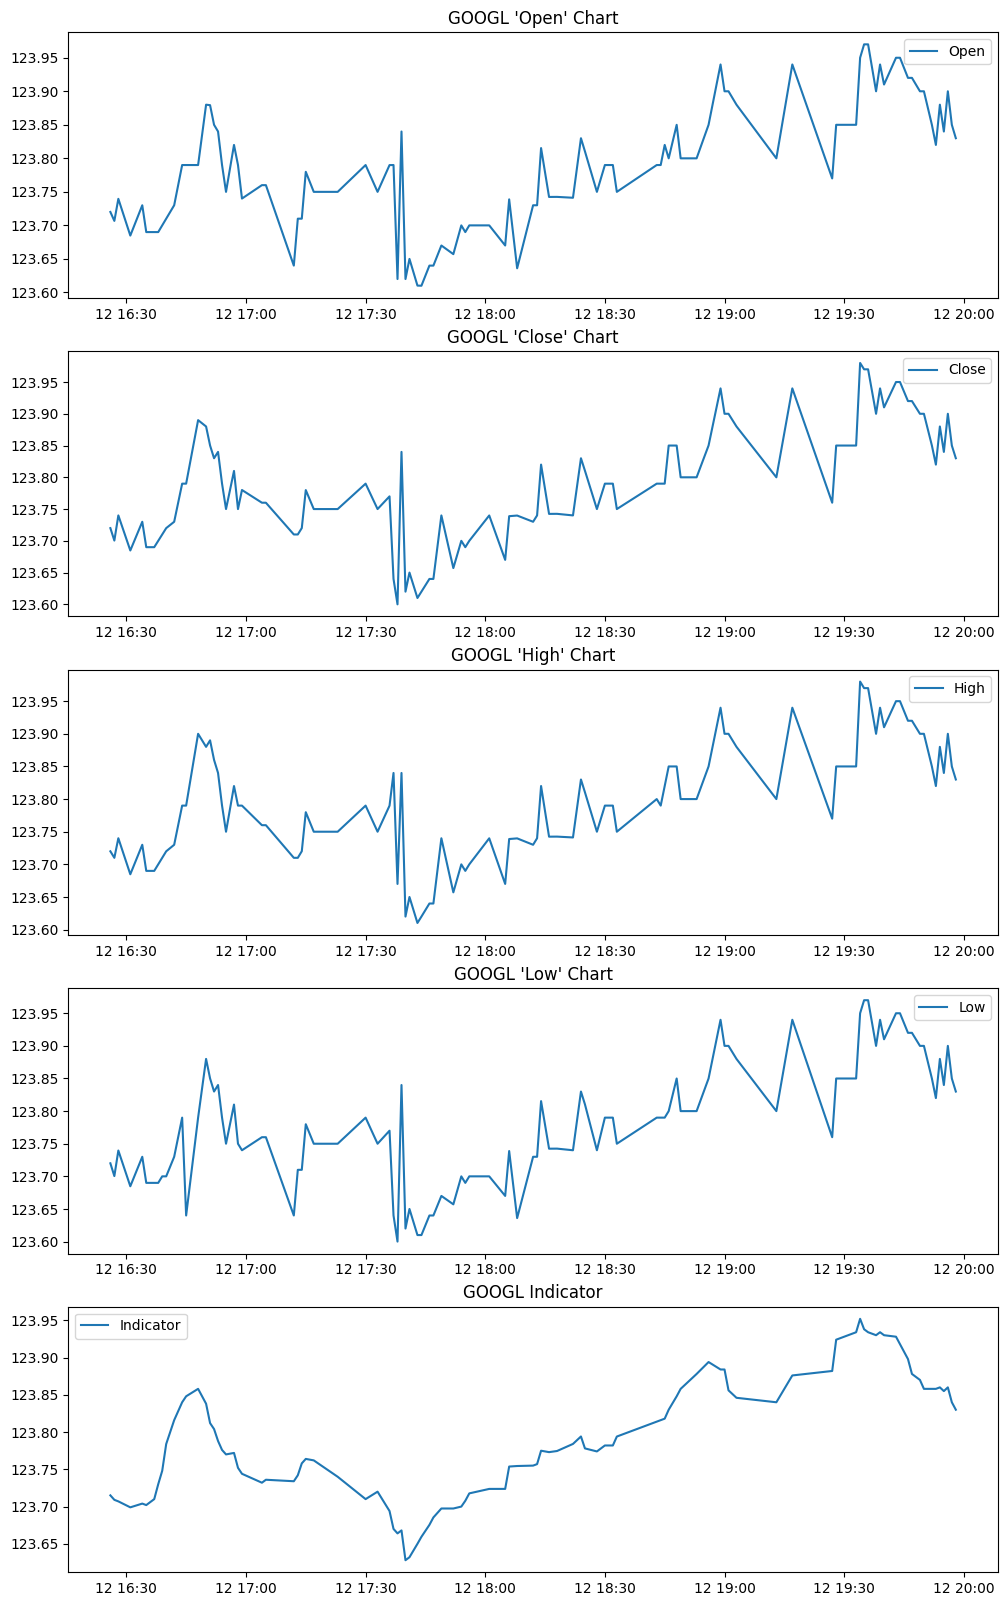

In [ ]:
# Plot the line charts
strategy.plot_chart()

In [ ]:
df = indicator1(data["GOOGL"], timeperiod = 5)
df

,timestamp,indicator
0,2023-06-12 19:58:00,123.83000
1,2023-06-12 19:57:00,123.84000
2,2023-06-12 19:56:00,123.86000
3,2023-06-12 19:55:00,123.85500
4,2023-06-12 19:54:00,123.86000
...,...,...
95,2023-06-12 16:34:00,123.70400
96,2023-06-12 16:31:00,123.69896
97,2023-06-12 16:28:00,123.70696
98,2023-06-12 16:27:00,123.70904


In [ ]:
df = data["GOOGL"]
df

,timestamp,open,high,low,close,volume
0,2023-06-12 19:58:00,123.8300,123.8300,123.8300,123.8300,434.0
1,2023-06-12 19:57:00,123.8500,123.8500,123.8500,123.8500,663.0
2,2023-06-12 19:56:00,123.9000,123.9000,123.9000,123.9000,439.0
3,2023-06-12 19:55:00,123.8400,123.8400,123.8400,123.8400,130.0
4,2023-06-12 19:54:00,123.8800,123.8800,123.8800,123.8800,335.0
...,...,...,...,...,...,...
95,2023-06-12 16:34:00,123.7300,123.7300,123.7300,123.7300,148.0
96,2023-06-12 16:31:00,123.6848,123.6848,123.6848,123.6848,594.0
97,2023-06-12 16:28:00,123.7396,123.7400,123.7396,123.7400,1527.0
98,2023-06-12 16:27:00,123.7067,123.7100,123.7004,123.7004,591.0


In [ ]:
# Plot a candlestick chart of ‘df and ‘indicator’.
fig = go.Figure(data=[go.Candlestick(x=df['timestamp'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'])])

fig.show()